## Part 1: Customer Churn Analysis
### Steps followed:
#### 1. I used feature_selector library to remove features with high missing values, 0 importance, low_importance & high collinearity
#### 2. Then I reduced Dimensionality using PCA
#### 3. Then I used combination of  SMOTE+ENN from imblearn library to down-sample majority class & up-sample minority class
#### 4. Then I manually trained models using tree based Classification algorithms.
#### 5. Then I used random or grid search for hyper parameter tuning.
#### 6. Alternatively one can try combination of different over sampling, under sampling techniques, algos, parameter tuning to get best f1 score,accuracy, precision, recall

#### In this problem because we have really high class imbalance we need to somehow improve recall for the churn class, we can negotiate on precision but not with a bad accuracy

In [1]:
import pandas

In [3]:
df = pandas.read_csv('/home/dineshb/Downloads/churnModelBase_Assignment2.csv')

In [4]:
X = df.iloc[:,:-1]  #independent columns
y = df.iloc[:,-1]   #target column

In [5]:
from feature_selector import FeatureSelector
# Features are in train and labels are in train_labels
fs = FeatureSelector(data = X, labels = y)

In [6]:
fs.identify_missing(missing_threshold = 0.4)
miss_val_feature = fs.ops['missing']

0 features with greater than 0.40 missing values.



##### this cell below is not used

In [43]:
# Pandas pythonic way of finding missing value features

# missValPercent = df.isnull().sum()/len(df)*100
# variables = df.columns
# non_missing_variable = [ ]
# for i in range(0,df.shape[1]):
#     if missValPercent[i]<=40:   #setting the threshold as 40%
#         non_missing_variable.append(variables[i])
# missValPercent.sort_values()[::-1]

##### Filling all the missing values with the median of respective column

In [44]:
for x in X.columns:
    X[x].fillna(X[x].median(),inplace=True)

In [45]:
df.head()

,userID,Contact_ind,Customer_status,ActiveSinceDays,num_AcD_m0,num_AcD_m1,r_AcD_m0_m12,r_AcD_m0_m123,daystofirstload,dayssincelastload,...,InAllRev_m1,InAllRev_m2,r_InAllRev_m0_m1,r_InAllRev_m0_m2,tot_InAllRev_3m,OgAllRev_m0,OgAllRev_m1,OgAllRev_m2,tot_OgAllRev_3m,targetid
0,1,1,4,221,1,2,50.000000,33.333333,0,153,...,0.0,497.00,0.000000,0.000000,497.00,199.00,150.00,485.00,834.00,0
1,2,1,4,1225,3,1,150.000000,90.000000,0,14,...,245.0,345.00,270.325203,192.196532,1255.00,839.00,245.00,345.00,1429.00,0
2,3,1,3,838,18,19,120.000000,174.193548,724,47,...,15000.0,13782.57,23.331778,25.392551,32282.57,16730.64,15559.52,11196.57,43486.73,0
3,4,1,4,486,2,0,200.000000,200.000000,0,3,...,0.0,0.00,26400.000000,26400.000000,264.00,302.00,0.00,0.00,302.00,0
4,5,1,3,928,1,1,33.333333,37.500000,0,147,...,0.0,10.00,0.000000,0.000000,10.00,400.00,0.00,577.00,977.00,0


##### finding columns having constant/ single unique value

In [46]:
fs.identify_single_unique()

2 features with a single unique value.



In [47]:
# pandas pythonic way of finding single unique value features

# var = df.var()
# var.sort_values()[::-1]

##### Finding features with high collinearity

In [48]:
fs.identify_collinear(correlation_threshold = 0.85)

18 features with a correlation magnitude greater than 0.85.



/usr/local/lib/python3.5/dist-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


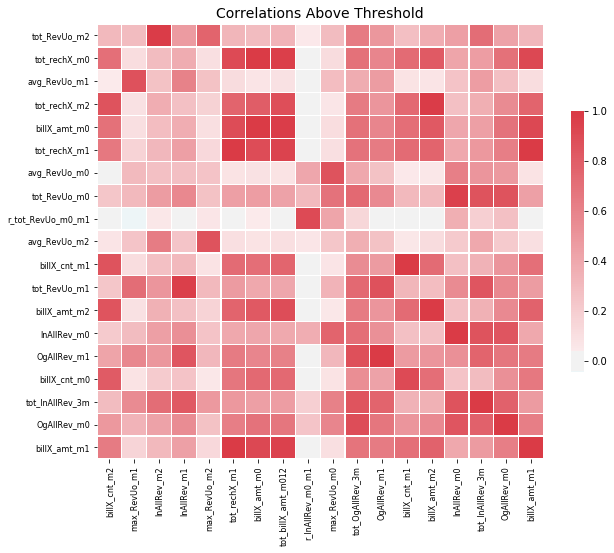

In [49]:
fs.plot_collinear(plot_all=False)

In [50]:
collinear_features = fs.ops['collinear']
collinear_features

['max_RevUo_m0',
 'max_RevUo_m1',
 'max_RevUo_m2',
 'tot_rechX_m1',
 'billX_amt_m0',
 'billX_amt_m1',
 'billX_amt_m2',
 'tot_billX_amt_m012',
 'billX_cnt_m1',
 'billX_cnt_m2',
 'InAllRev_m0',
 'InAllRev_m1',
 'InAllRev_m2',
 'r_InAllRev_m0_m1',
 'tot_InAllRev_3m',
 'OgAllRev_m0',
 'OgAllRev_m1',
 'tot_OgAllRev_3m']

In [51]:
# pandas, seaborn, pythonic way of finding collinear features

# import seaborn as sns
# corrmat = df.corr()
# top_corr_features = corrmat.index
# plt.figure(figsize=(75,75))
# #plot heat map
# corrdf = df[top_corr_features].corr()
# g=sns.heatmap(corrdf.iloc[:30,:30],annot=True,cmap="RdYlGn")

##### finding features that has no importance on target variable

In [52]:
fs.identify_zero_importance(task = 'classification', 
                            eval_metric = 'auc', 
                            n_iterations = 10, 
                             early_stopping = True)
# list of zero importance features
zero_importance_features = fs.ops['zero_importance']
zero_importance_features

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[207]	valid_0's auc: 0.925751
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[346]	valid_0's auc: 0.927912
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[136]	valid_0's auc: 0.925643
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[89]	valid_0's auc: 0.924337
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[160]	valid_0's auc: 0.922308
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[141]	valid_0's auc: 0.922397
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[116]	valid_0's auc: 0.923952
Training until validation scores don't improve for 100 rounds.
Early st

['avgdays_btw_loads_l6', 'fail_RtlTxncnt_m0']

##### finding features with low importance

In [53]:
fs.identify_low_importance(cumulative_importance = 0.99)
low_importance_features = fs.ops['low_importance']
low_importance_features

100 features required for cumulative importance of 0.99 after one hot encoding.
11 features do not contribute to cumulative importance of 0.99.



['r_RtlTxns_cnt_m1_m2',
 'billX_amt_m1',
 'r_tot_RevUo_m0_m1',
 'RtlTxn_dayscnt_m0',
 'billX_cnt_m2',
 'billX_cnt_m1',
 'billX_cnt_m0',
 'Contact_ind',
 'percent_resolved_3m',
 'avgdays_btw_loads_l6',
 'fail_RtlTxncnt_m0']

In [54]:
# pandas pythonic way of finding no,low,high importance features

# import pandas as pd
# import numpy as np
# df = df.fillna(0)

# from sklearn.ensemble import ExtraTreesClassifier
# import matplotlib.pyplot as plt
# model = ExtraTreesClassifier()
# model.fit(X,y)
# # print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
# #plot graph of feature importances for better visualization
# plt.figure(figsize=(5,20))
# feat_importances = pd.Series(model.feature_importances_, index=X.columns)
# feat_importances.nlargest(30).plot(kind='barh')
# plt.show()

# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2

# for x in X.columns:
#     df[x] = (df[x]- df[x].min())/(df[x].max()-df[x].min())

# X = df.iloc[:,:-1]  #independent columns
# y = df.iloc[:,-1]    #target column

# bestfeatures = SelectKBest(score_func=chi2, k=30)
# fit = bestfeatures.fit(X,y)
# dfscores = pd.DataFrame(fit.scores_)
# dfcolumns = pd.DataFrame(X.columns)
# #concat two dataframes for better visualization 
# featureScores = pd.concat([dfcolumns,dfscores],axis=1)
# featureScores.columns = ['Specs','Score']  #naming the dataframe columns
# print(featureScores.nlargest(30,'Score'))  #print 10 best features


##### removing unwanted features

In [55]:
new_X = fs.remove(methods = 'all', keep_one_hot=False)
fs.check_removal()

['zero_importance', 'collinear', 'single_unique', 'low_importance', 'missing'] methods have been run

Removed 26 features including one-hot features.
Total of 26 features identified for removal


['fail_RtlTxncnt_m0',
 'InAllRev_m2',
 'max_RevUo_m2',
 'OgAllRev_m1',
 'avgdays_btw_loads_l6',
 'tot_InAllRev_3m',
 'Contact_ind',
 'max_RevUo_m1',
 'InAllRev_m1',
 'tot_rechX_m1',
 'tot_billX_amt_m012',
 'r_tot_RevUo_m0_m1',
 'InAllRev_m0',
 'billX_cnt_m0',
 'billX_cnt_m2',
 'max_RevUo_m0',
 'billX_amt_m2',
 'percent_resolved_3m',
 'billX_amt_m0',
 'tot_OgAllRev_3m',
 'r_InAllRev_m0_m1',
 'r_RtlTxns_cnt_m1_m2',
 'billX_cnt_m1',
 'RtlTxn_dayscnt_m0',
 'OgAllRev_m0',
 'billX_amt_m1']

In [222]:
from imblearn.under_sampling import EditedNearestNeighbours
enn = EditedNearestNeighbours(n_neighbors=4)
X_res, y_res = enn.fit_resample(new_X, y)

In [239]:
import numpy as np
print(y_res.shape[0]- np.count_nonzero(y_res),np.count_nonzero(y_res),y_res.shape[0])

19033 19033 38066


##### Now I'm reducing dimensionality using PCA

In [246]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca_result = pca.fit_transform(pandas.DataFrame(X_res))
sum=0
for x in pca.explained_variance_ratio_:
    sum=sum+x
print(sum)

0.9242195403489337


In [247]:
pca = PCA(n_components=10)
pca_result = pca.fit_transform(pandas.DataFrame(X_res))
sum=0
for x in pca.explained_variance_ratio_:
    sum=sum+x
print(sum)

0.9881440022397759


In [248]:
principalDf = pandas.DataFrame(data = pca_result
             , columns = ['pc1', 'pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10'])

In [290]:
principalDf['target'] = y_res

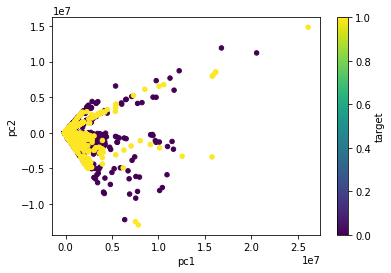

In [251]:
principalDf.plot.scatter(x='pc1',y='pc2',c='target',colormap='viridis')

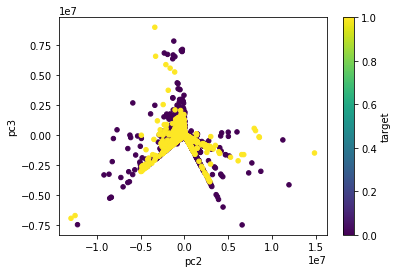

In [291]:
principalDf.plot.scatter(x='pc2',y='pc3',c='target',colormap='viridis')

In [256]:
principalDf.drop(['target'],axis=1,inplace=True)
# y_res.shape

##### one can keep changing algos for oversampling, downsampling & can also change the ratio parameter to maintain class balance & get different results

In [257]:
# from imblearn.under_sampling import EditedNearestNeighbours
# enn = EditedNearestNeighbours(n_neighbors=4)
# X_res, y_res = enn.fit_resample(principalDf, y)

# from imblearn.combine import SMOTEENN
# sme = SMOTEENN(random_state=42)
# X_res, y_res = sme.fit_resample(principalDf, y)

from imblearn.over_sampling import SMOTE
sme = SMOTE()
X_res,y_res = sme.fit_resample(principalDf,y_res)

In [258]:
import numpy as np
print(y_res.shape[0]- np.count_nonzero(y_res),np.count_nonzero(y_res),y_res.shape[0])

19033 19033 38066


##### Let's take a look at evaluation metrics using SMOTE data

In [301]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.6, random_state=123)

In [302]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
clf1 = AdaBoostClassifier(n_estimators = 200)
n_estimators = 100 #(default value) 
# base_estimator = DecisionTreeClassifier (default value)
clf1.fit(X_train,y_train)
prediction = clf1.predict(X_test)
from sklearn.metrics import accuracy_score,average_precision_score,confusion_matrix,f1_score
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70     11355
           1       0.70      0.70      0.70     11485

    accuracy                           0.70     22840
   macro avg       0.70      0.70      0.70     22840
weighted avg       0.70      0.70      0.70     22840



In [303]:
from sklearn.ensemble import GradientBoostingClassifier
clf1 = GradientBoostingClassifier(max_depth=5,n_estimators=250, random_state=10, max_features= 'sqrt', subsample =0.8)
clf1.fit(X_train,y_train)
clf1.score(X_train,y_train)

0.8492053067122028

In [304]:
prediction = clf1.predict(X_test)
from sklearn.metrics import accuracy_score,average_precision_score,confusion_matrix,f1_score,classification_report
accuracy_score(y_test,prediction)
confusion_matrix(y_test,prediction)
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75     11355
           1       0.75      0.75      0.75     11485

    accuracy                           0.75     22840
   macro avg       0.75      0.75      0.75     22840
weighted avg       0.75      0.75      0.75     22840



In [305]:
from xgboost import XGBClassifier
clf2 = XGBClassifier(max_depth=5,n_estimators=200,n_jobs=2,random_state=10)
clf2.fit(X_train, y_train)
clf2.score(X_train,y_train)

0.8279259161959805

In [306]:
prediction = clf2.predict(X_test)
from sklearn.metrics import accuracy_score,average_precision_score,confusion_matrix,f1_score
accuracy_score(y_test,prediction)
confusion_matrix(y_test,prediction)
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74     11355
           1       0.74      0.74      0.74     11485

    accuracy                           0.74     22840
   macro avg       0.74      0.74      0.74     22840
weighted avg       0.74      0.74      0.74     22840



In [310]:
from sklearn.ensemble import RandomForestClassifier
clf3 = RandomForestClassifier(n_estimators= 300, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None)
clf3.fit(X_train, y_train)
prediction = clf3.predict(X_test)
from sklearn.metrics import accuracy_score,average_precision_score,confusion_matrix,f1_score
accuracy_score(y_test,prediction)
confusion_matrix(y_test,prediction)
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78     11355
           1       0.79      0.77      0.78     11485

    accuracy                           0.78     22840
   macro avg       0.78      0.78      0.78     22840
weighted avg       0.78      0.78      0.78     22840



### I Played with data tried different combinations of algos, params was able to get really good accuracy.  sometimes good precision, poor recall. sometime good recall, poor precision without hyper parameter tuned or tpot library , but after wasting lots of time I decided to go ahead with this Random forest it stands good on all evaluation metrics has cross validated accuracy around
## 0.75

In [309]:
from sklearn import cross_validation
cross_validation.cross_val_score(clf3, X_res, y_res, scoring='accuracy')

array([0.74208038, 0.74834489, 0.74511349])

##### for some reason random search is throwing memory leak error even after running it for more than 24 hours at the end it returned default params, wasted a lot of time here, most probably I'm using a very old linux distro & packages which are throwing conflicts. See the score at the end of the output of this cell after just few iterations it gave a score of over 
### 0.99 
###### but when I used get_params() it returned default values only

In [32]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf_tuned = RandomizedSearchCV(clf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_tuned.fit(X_res, y_res)
rf_tuned.score(X_res,y_res)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/usr/local/lib/python3.5/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.5/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.5/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.5/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarnin

0.999920720911181

###### there are further improvements that can be made but due to lack of time I'll go ahead with my last model only

In [35]:
# import pickle
# pickle.dump(rf_tuned, open('RF_Tuned_Mobikwik.pkl', 'wb'))
# rf_tuned = pickle.load(open('RF_Tuned_Mobikwik.pkl', 'rb'))
# result = rf_tuned.score(X_res, y_res)

##### Unfortunately I wasted a lot of time in making tpot to work on my machine. Otherwise I would have received  even better models with f1-score over .90.  I've choosen params with low values.

In [314]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.75, random_state=123)

from tpot import TPOTClassifier
pipeline_optimizer = TPOTClassifier(generations=50, population_size=100, cv=5,
                                    random_state=42, verbosity=2, scoring ='recall')
pipeline_optimizer.fit(X_train, y_train)
print(pipeline_optimizer.score(X_test, y_test))
pipeline_optimizer.export('tpot_exported_pipeline.py')

Generation 1 - Current best internal CV score: 0.9453816938623096
Generation 2 - Current best internal CV score: 0.9453816938623096
Generation 3 - Current best internal CV score: 0.9453816938623096
Generation 4 - Current best internal CV score: 0.9453816938623096
Generation 5 - Current best internal CV score: 0.9453816938623096

Best pipeline: GaussianNB(input_matrix)
0.9605263157894737


In [319]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.75, random_state=123)

from tpot import TPOTClassifier
pipeline_optimizer = TPOTClassifier(generations=100, population_size=100, cv=5,
                                    random_state=42, verbosity=2, scoring ='accuracy')
pipeline_optimizer.fit(X_train, y_train)
print(pipeline_optimizer.score(X_test, y_test))
pipeline_optimizer.export('tpot_exported_pipeline.py')

Generation 1 - Current best internal CV score: 0.7341321359858318
Generation 2 - Current best internal CV score: 0.7341321359858318
Generation 3 - Current best internal CV score: 0.7351832628731562
Generation 4 - Current best internal CV score: 0.7351832628731562
Generation 5 - Current best internal CV score: 0.736863813611107
Generation 6 - Current best internal CV score: 0.7413834467373596
Generation 7 - Current best internal CV score: 0.7413834467373596
Generation 8 - Current best internal CV score: 0.7413834467373596
Generation 9 - Current best internal CV score: 0.7413834467373596
Generation 10 - Current best internal CV score: 0.7413834467373596

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.05, min_samples_leaf=1, min_samples_split=15, n_estimators=100)
0.7509982486865149


## Part 2: Customer Segmentation

### Steps Followed:
#### 1. we can do clustering on the whole dataset or can choose features we want to use & then 
#### 2. Within those clusters we can find subclusters using even less number of features
#### 3. For Clustering on the basis of profibility, one needs to have business knowledge of what features affects it.

In [56]:
X['target'] = y
new_X['target'] = y

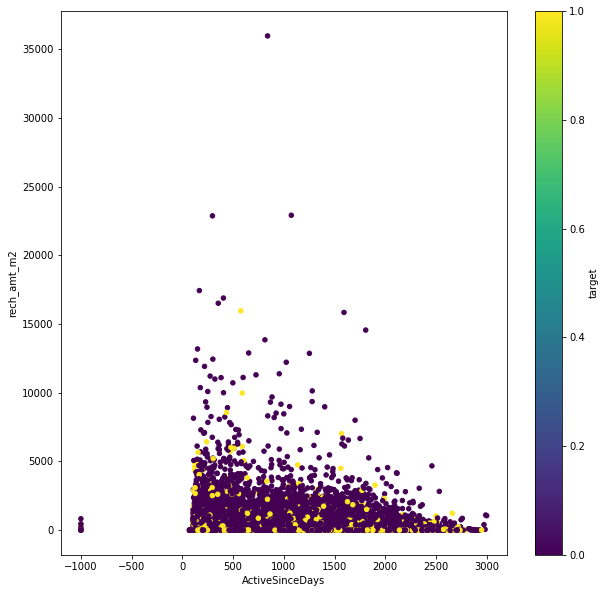

In [57]:
X.plot(x='ActiveSinceDays', y ='rech_amt_m2',c='target',kind='scatter',colormap='viridis', figsize=(10,10))

##### If we will do clustering on the basis of the features used in the graph above. We will have 2 major clusters people who recharge more than 4000 or less. Similarly let's take a look at other plots as well 

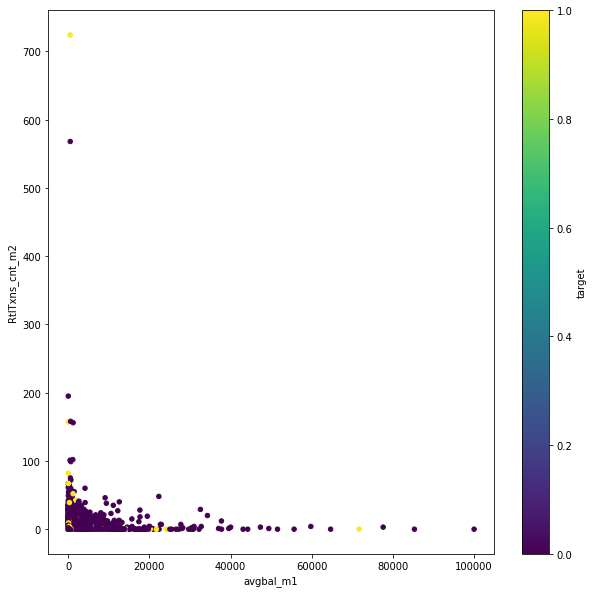

In [59]:
new_X.plot(x='avgbal_m1', y ='RtlTxns_cnt_m2',c='target',kind='scatter',colormap='viridis', figsize=(10,10))

#### to find the optimal number of clusters 'k' use the elbow method in our case for whole data it is around 2 to 5 , most optimal being 4

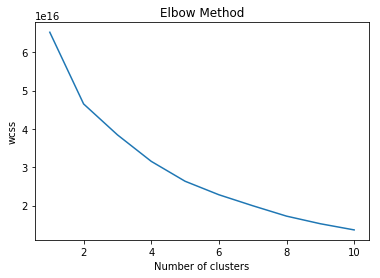

In [28]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)TT
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

#### generic customer segments can be made by using all features but before that you can reduce dimensionality as well

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca_result = pca.fit_transform(pandas.DataFrame(new_X))
sum=0
for x in pca.explained_variance_ratio_:
    sum=sum+x
print(sum)

0.9550626578329411


In [29]:
##Fitting kmeans to the dataset with k=4
from sklearn.cluster import KMeans
km4=KMeans(n_clusters=4,init='k-means++', max_iter=200, n_init=10, random_state=0)
y_means = km4.fit_predict(new_X)

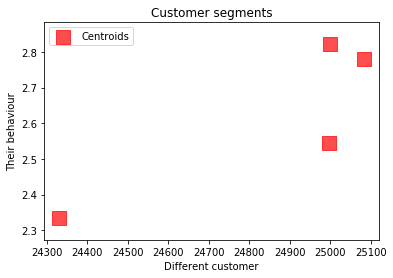

In [30]:
#Visualizing the clusters for k=4
from matplotlib import pyplot as plt
plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Different customer')
plt.ylabel('Their behaviour')
plt.legend()
plt.show()

##### clustering on few features

In [87]:
def doKmeans(X, n_clusts=4):
    model = KMeans(n_clusters=n_clusts)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(new_X.iloc[:,3:10], 4)
kmeans = pandas.DataFrame(clust_labels)
new_X['kmeans']=kmeans

### play with different features get different customer segments. for profibility, for recent active, for finding loyal , for recommendations

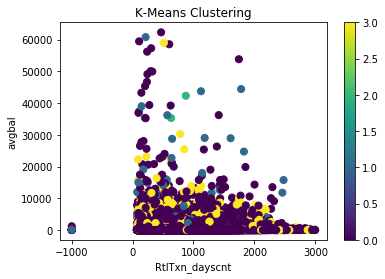

In [88]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(new_X['ActiveSinceDays'],new_X['avgbal_m0'],
                     c=new_X['kmeans'],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('RtlTxn_dayscnt')
ax.set_ylabel('avgbal')
plt.colorbar(scatter)

### My kernel died many times while plotting, it is taking/ took a lot of time to fit on the dataset I would have done validation myself but since the kernel was busy & due to lack of time I can only mention simple techniques we can use like weighted minimum distance, gini coefficient or the mostly used Silhoutte coefficient. This is what I was able to do in the given time. It was fun thanks for giving me this opportunity